## Konvolucijske neuronske mreže (CNN)

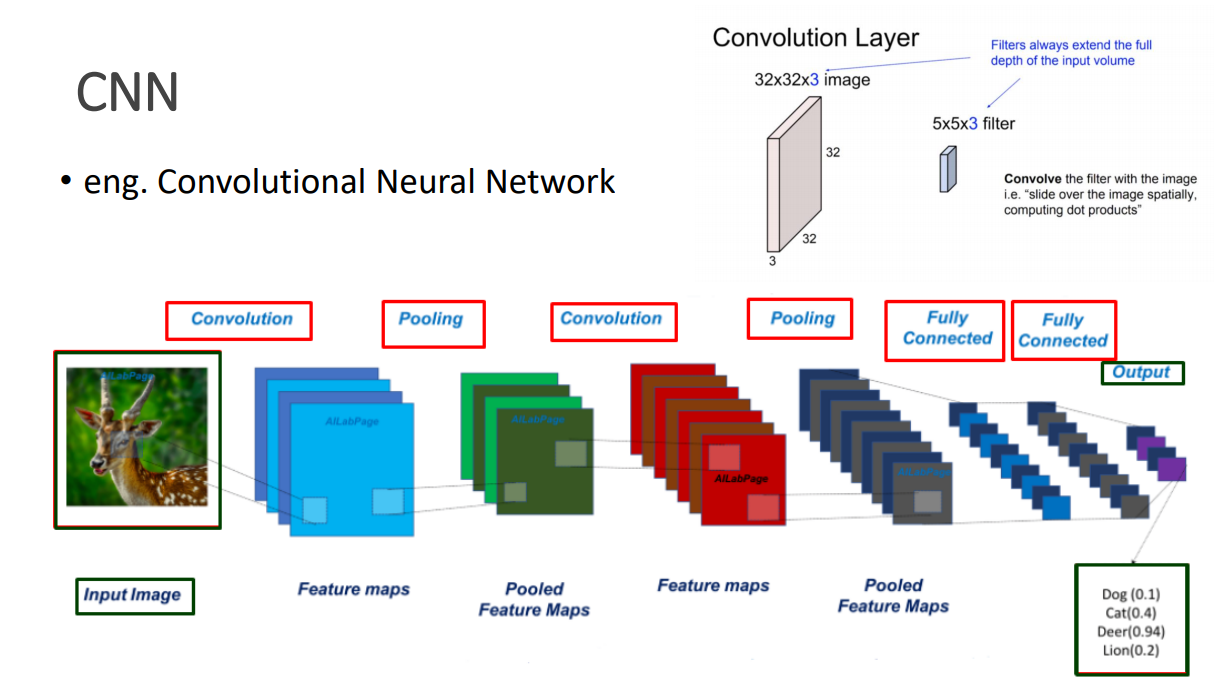

##CIFAR-10 dataset



Baza: https://www.cs.toronto.edu/~kriz/cifar.html

- 60.000 slika u boji* veličine 32x32 piksela (50.000 za učenje, 10.000 za testiranje)
 - RGB za svaki piksel promatramo 3 boje -> 32x32x3
- na slikama se nalaze slike aviona, automobila, ptica, mačaka, jelena, psa, žaba, konja, brodova i kamiona
* Svaka slika je označena sa brojem (0-9) koji predstavlja jednu klasu
 * Ukupno imamo 10 klasa
  * 6000 slika za svaku klasu


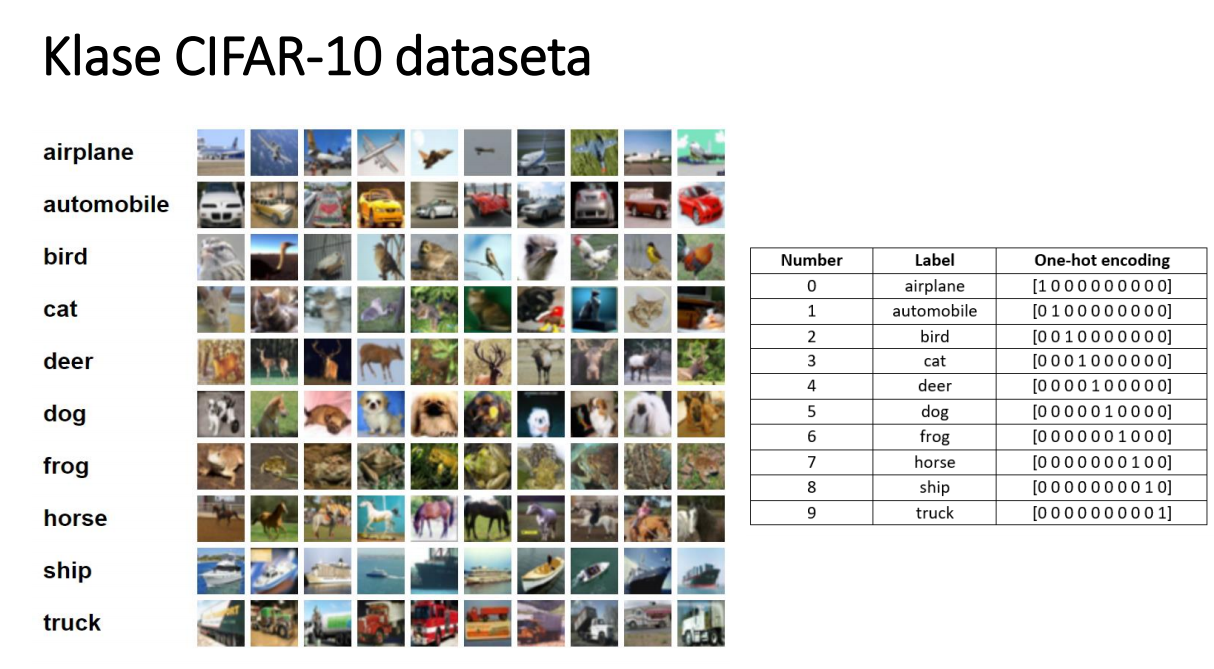

**Provjera i ažuriranje verzija tensorflow i keras**

Potrebne verzije:
- tensorflow:  2.1.0 ili više
- keras:   2.2.4-tf ili više

In [ ]:
import tensorflow as tf
tf.__version__

'2.12.0'

In [ ]:
from tensorflow import keras
keras.__version__

'2.12.0'

**Dohvačanje i upravljanje podacima**

In [ ]:
from keras.datasets import cifar10
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

170498071/170498071 [==============================] - 13s 0us/step


Ispisati dimenzije od x_train i y_train. Koliko one iznose?

In [ ]:
#dimenzije x_train
x_train.shape

(50000, 32, 32, 3)

In [ ]:
#dimenzije y_train
y_train.shape

Prikazati sadržaj od y_train. Što nam se nalazi u toj varijabli?

In [ ]:
# sadržaj y_train
y_train


In [ ]:
#y_train_novi=y_train[:,0]

In [ ]:
#y_train_novi[0]

Dohvačanje podataka o prvoj slici.
Prikazuju sam se podaci o pikselima.

In [ ]:
x_train.shape

In [ ]:
print(x_train[0]) #do 255 vrijednosti

Prikaz prve slike

In [ ]:
import matplotlib.pyplot as plt
plt.imshow(x_train[0])

Prikaz njene oznake:

In [ ]:
print('Oznaka prve slike:', y_train[0])

Prikažite drugu sliku

In [ ]:
#prikaz druge slike
plt.imshow(x_train[1])

Prikažite njenu oznaku

In [ ]:
#oznaka 2. slike
y_train[1]

###Priprema podataka

####one-hot-encoding
* ovo moze biti korisno kada ima više klasa
* Pretvorba oznaka u oblik one-hot encoding kako bi  mogli dobiti vjerojatnost za svaku klasu

In [ ]:
y_train_one_hot = keras.utils.to_categorical(y_train, 10)
y_test_one_hot = keras.utils.to_categorical(y_test, 10)

In [ ]:
y_train_one_hot

In [ ]:
print('Oznaka prve slike u obliku one-hot:', y_train_one_hot[0])

**Normalizacija podataka**

Želimo da nam vrijednosti budu između 0 i 1

In [ ]:
#x_train = x_train.astype('float32')  # po meni nepotrebno al mozes pokazat?
#x_test = x_test.astype('float32')
x_train = x_train / 255
x_test = x_test / 255

In [ ]:
x_train[0]

Prikažite vrijednosti za prvu sliku

In [ ]:
#sadržaj prve slike nakon normalizacije
x_train[0]

## Kreiraje CNN-a

**Arhitektura** CNN-a koji čemo kreirati:


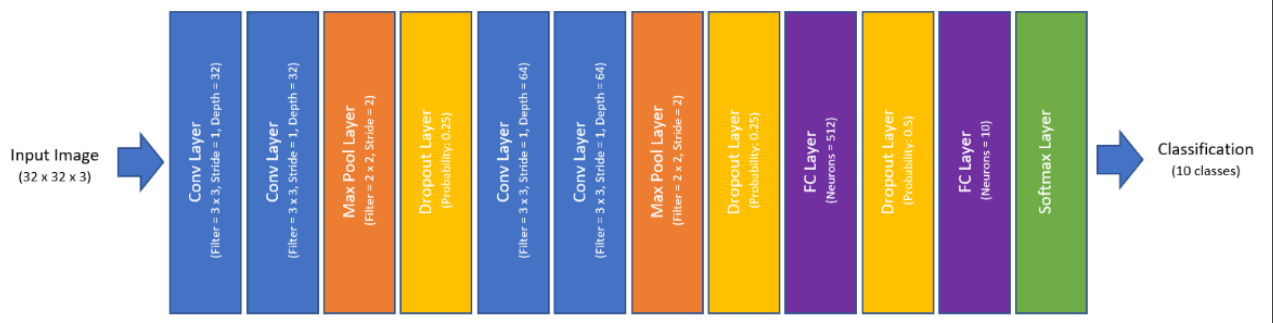



- Conv Layer (Filter size 3x3, Depth 32)
- Conv Layer (Filter size 3x3, Depth 32)
- Max Pool Layer (Filter size 2x2)
- Dropout Layer (Prob of dropout 0.25)
- Conv Layer (Filter size 3x3, Depth 64)
- Conv Layer (Filter size 3x3, Depth 64)
- Max Pool Layer (Filter size 2x2)
- Dropout Layer (Prob of dropout 0.25)
- FC Layer (512 neurons)
- Dropout Layer (Prob of dropout 0.5)
- FC Layer, Softmax (10 neurons)

